# Hierarchical Clustering
Within this, we're going to use Scikit-Learn and Matplotlib to visualize how hierarchical clustering works.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

data = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')

In [ ]:
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
# Remove the several columns for the sake of this exercise
data = data.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)

# Remove rows with NaN
# INSERT CODE HERE
data = data.dropna()
# View the first five rows
# INSERT CODE HERE
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [ ]:
# Only use the first 50 datapoints of the dataset for easy visualization
# INSERT CODE HERE
data_fifty = data.head(50)


In [ ]:
# View the shape of the data frame. It should be (50, 17)
# INSERT CODE HERE
data_fifty.shape

(50, 17)

In [ ]:
# Using the AgglomerativeClustering() function with a distance threshold of 0 and no n_clusters, fit the dataset.
# INSERT CODE HERE

clustering_model = AgglomerativeClustering(n_clusters = None , distance_threshold= 0)
clustering_model.fit(data_fifty)
clustering_model.labels_


array([39, 29, 27, 31, 28, 48, 46, 33, 47, 30, 34, 32, 43, 49, 35, 41, 23,
       24, 13, 37, 42, 40, 15, 25, 16,  7, 19, 14, 36,  6, 44, 11, 20, 17,
       38, 18, 21,  8, 45,  3, 22, 26,  9, 12, 10,  4,  5,  1,  2,  0])

In [ ]:
# Print out the distances of that model
# I.e. n_clusters_, min(), and max()
# INSERT CODE HERE

print(f"Nombre clusters = {clustering_model.n_clusters_} \n"
       f" Min = {clustering_model.labels_.min()} \n"
        f"Max =  {clustering_model.labels_.max()}")


Nombre clusters = 50 
 Min = 0 
Max =  49


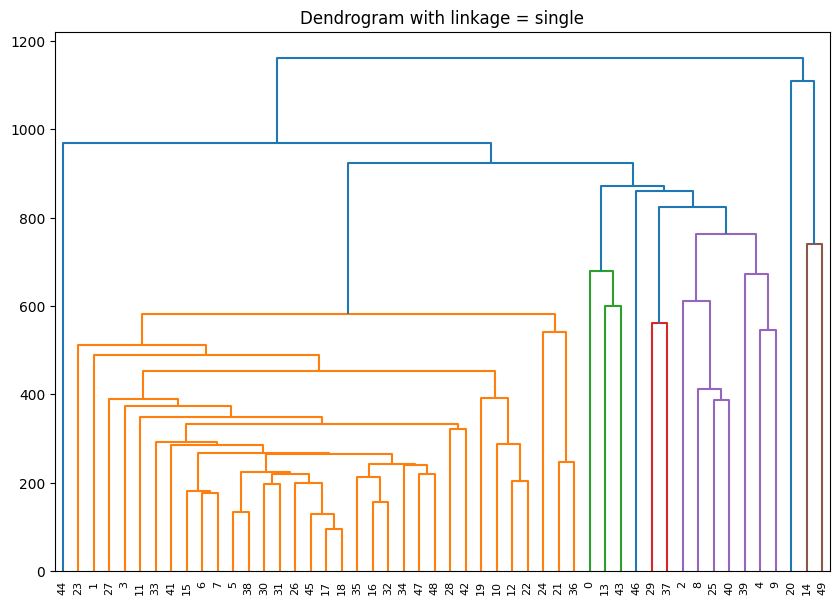

In [ ]:
# Single
# Using single linkage, create and display a dendogram.
# INSERT CODE HERE
# Code trouvé" sur la ressource stackabuse du cours
clustering_model_single = AgglomerativeClustering(n_clusters = None , distance_threshold= 0, linkage = 'single')
clustering_model_single.fit(data_fifty)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with linkage = single")
clusters = shc.linkage(data_fifty, method = 'single')
shc.dendrogram(clusters)

plt.show()

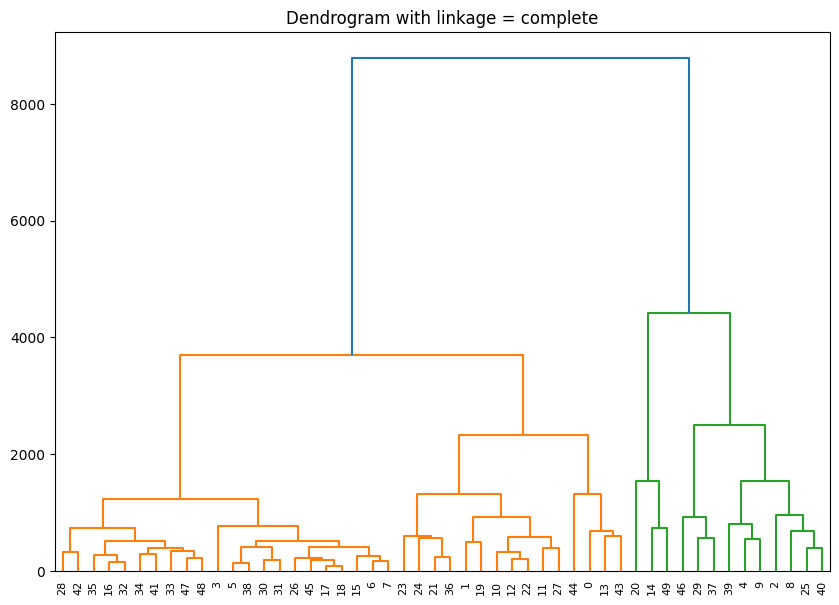

In [ ]:
# Complete
# Using complete linkage, create and display a dendogram.
# INSERT CODE HERE

clustering_model_complete = AgglomerativeClustering(n_clusters = None , distance_threshold= 0, linkage = 'complete')
clustering_model_complete.fit(data_fifty)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with linkage = complete")
clusters = shc.linkage(data_fifty, method = "complete")
shc.dendrogram(clusters)
plt.show()

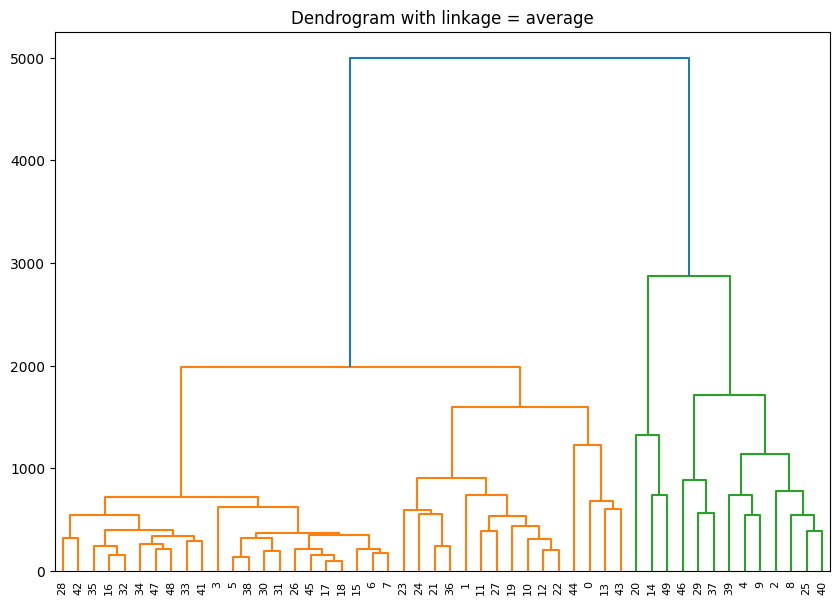

In [ ]:
# Average
# Using average linkage, create and display a dendogram.
# INSERT CODE HERE

clustering_model_complete = AgglomerativeClustering(n_clusters = None , distance_threshold= 0, linkage = 'average')
clustering_model_complete.fit(data_fifty)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with linkage = average")
clusters = shc.linkage(data_fifty, method = "average")
shc.dendrogram(clusters)
plt.show()

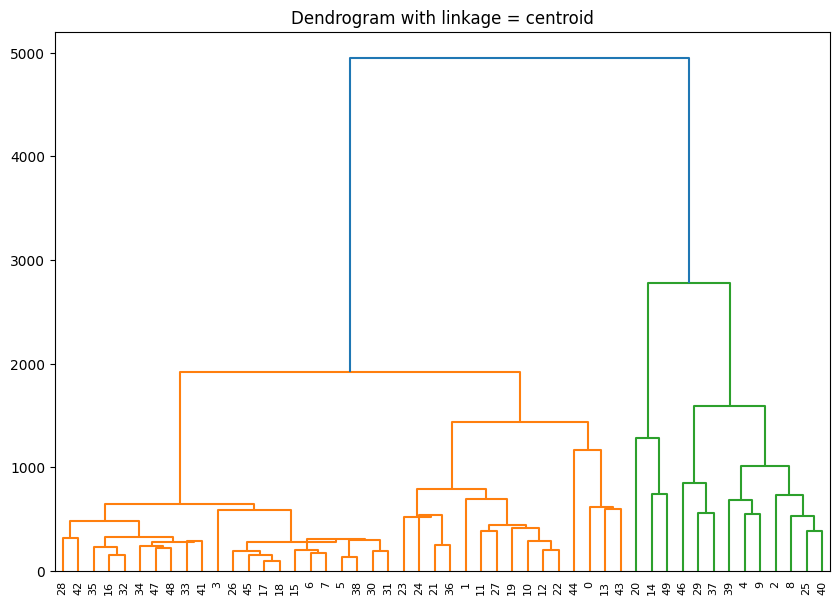

In [ ]:
# Centroid
# Using centroid linkage, create and display a dendogram.
# INSERT CODE HERE
#No centroid, just "ward"

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with linkage = centroid")
clusters = shc.linkage(data_fifty, method = "centroid")
shc.dendrogram(clusters)
plt.show()

In [ ]:
# After observing the dendograms above, let's say that you want to choose "Average" linkage with only 2 clusters.
# What are the labels of each of the datapoints?
# Print these labels out
# INSERT CODE HERE

#fit_predict d'apres docu scikit learn

clustering_model_choose = AgglomerativeClustering(n_clusters = 2 , linkage = 'average')
labels = clustering_model_choose.fit_predict(data_fifty)

print(labels)

[1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 0]
